## Facial Demographics

Importing required libraries

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/drive')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
df_1 = pd.read_pickle('/drive/My Drive/ML Data/UTKFaceData_1.pkl')
df1 = df_1.iloc[:5000,:]
df_2 = pd.read_pickle('/drive/My Drive/ML Data/UTKFaceData_2.pkl')
df2 = df_2.iloc[5000:10000,:]
df_3 = pd.read_pickle('/drive/My Drive/ML Data/UTKFaceData_3.pkl')
df3 = df_3.iloc[10000:15000,:]
df_4 = pd.read_pickle("/drive/My Drive/ML Data/UTKFaceData_4.pkl")
df4 = df_4.iloc[15000:20000,:]
df_5 = pd.read_pickle("/drive/My Drive/ML Data/UTKFaceData_5.pkl")
df5 = df_5.iloc[20000:,:]

print("Done")       # Just an interrupt.

frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

print("Dataframe complete")

Done
Dataframe complete


Now I select only the required coloumns for consideration.

In [ ]:
df_temp = df.iloc[:,8:]

data = df.iloc[:,1:8]
data = data.replace(to_replace='None', value=np.nan).dropna()
data = data.reset_index(drop=True)
print(data.shape)

convert_dict = {'Age': int, 
                'Gender': int,
                 'Race' : int
               } 
  
data = data.astype(convert_dict) 
 
data.head()

(23705, 7)


/usr/local/lib/python3.6/dist-packages/pandas/core/missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Age,Gender,Race,Red filter,Green filter,Blue filter,Grey filter
0,100,0,0,"[215, 213, 212, 191, 193, 213, 201, 191, 167, ...","[206, 204, 203, 182, 184, 204, 192, 182, 158, ...","[201, 199, 198, 177, 177, 197, 185, 175, 149, ...","[208, 206, 205, 184, 186, 206, 194, 184, 160, ..."
1,100,0,0,"[118, 120, 122, 123, 122, 121, 120, 120, 122, ...","[122, 124, 126, 127, 126, 125, 124, 124, 126, ...","[133, 135, 137, 138, 137, 136, 133, 133, 135, ...","[122, 124, 126, 127, 126, 125, 124, 124, 126, ..."
2,100,1,0,"[219, 232, 232, 223, 230, 226, 180, 119, 112, ...","[223, 235, 237, 230, 237, 237, 192, 135, 127, ...","[226, 240, 243, 240, 253, 255, 216, 160, 156, ...","[222, 235, 236, 229, 237, 236, 191, 133, 126, ..."
3,100,1,0,"[78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 7...","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 8...","[93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 9...","[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 8..."
4,100,1,0,"[65, 66, 67, 68, 68, 68, 68, 67, 76, 84, 94, 1...","[69, 70, 71, 72, 72, 72, 72, 71, 80, 88, 98, 1...","[80, 81, 82, 83, 83, 83, 83, 82, 91, 99, 109, ...","[69, 70, 71, 72, 72, 72, 72, 71, 80, 88, 98, 1..."


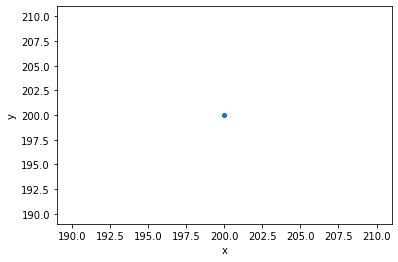

In [ ]:
axis_data = df_temp.iloc[:,[-1,-2]]
sns.scatterplot(x='x', y='y', data=axis_data)
# Seeing the distribution of the size of all images.

General EDA on entire dataset

In [ ]:
df[['Age', 'Gender', 'Race']] = df[['Age', 'Gender', 'Race']].apply(pd.to_numeric) 

data.dtypes

Age              int64
Gender           int64
Race             int64
Red filter      object
Green filter    object
Blue filter     object
Grey filter     object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           23705 non-null  object
 1   Gender        23705 non-null  object
 2   Race          23705 non-null  object
 3   Red filter    23705 non-null  object
 4   Green filter  23705 non-null  object
 5   Blue filter   23705 non-null  object
 6   Grey filter   23705 non-null  object
dtypes: object(7)
memory usage: 1.3+ MB


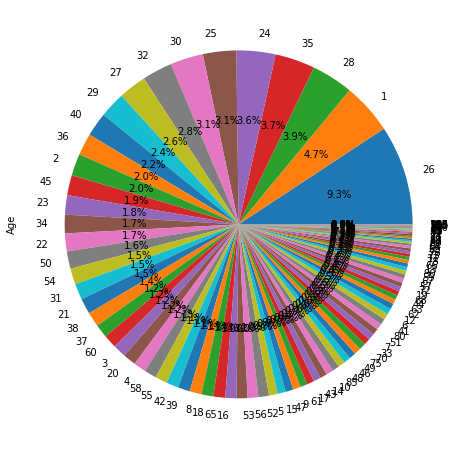

In [ ]:
#pie_graph
plt.figure(1, figsize=(8,8))
data.Age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

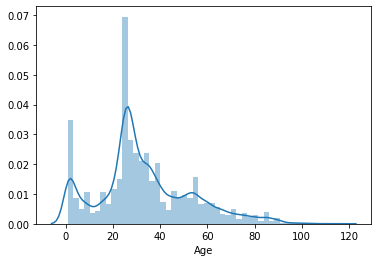

In [ ]:
sns.distplot(data['Age'])

Text(0, 0.5, 'Frequency')

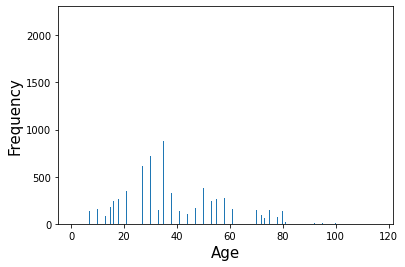

In [ ]:
data['Age'].hist(bins=1000,grid=False)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

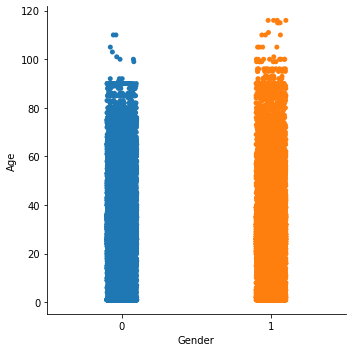

In [ ]:
sns.catplot(x="Gender", y="Age",data=data);

In [ ]:
print(data.iloc[:,0])

df_tem = data.iloc[:,:2]
print(df_tem.head())
print(type(df_tem.iloc[0,1]))

0        100
1        100
2        100
3        100
4        100
        ... 
23700      9
23701      9
23702      9
23703      9
23704      9
Name: Age, Length: 23705, dtype: int64
   Age  Gender
0  100       0
1  100       0
2  100       1
3  100       1
4  100       1
<class 'numpy.int64'>


    Age  Gender
0   100       0
1   100       0
11  101       0
13  103       0
14  105       0


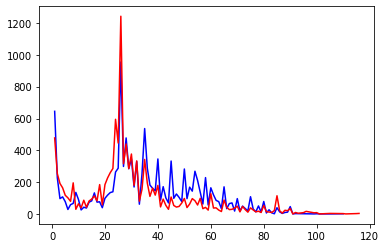

In [ ]:
#age_group_value =  df_temp.Age.unique()
#sns.lineplot(x = age_group_value, y ='Age', hue="Gender", data=df_temp)

cou_male = df_tem[df_tem.iloc[:,1] == 0 ]
cou_female = df_tem[df_tem.iloc[:,1] == 1]
print(cou_male.head())
counts_male = cou_male['Age'].value_counts().sort_index(axis = 0)
counts_female = cou_female['Age'].value_counts().sort_index(axis = 0)

plt.plot(counts_male.index, counts_male[:], color='blue')
plt.plot(counts_female.index, counts_female[:], color='red')
plt.show()

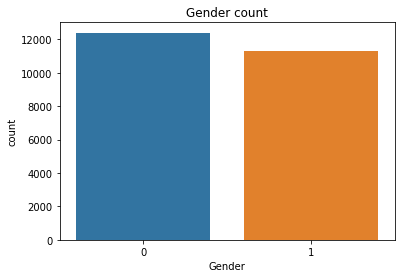

In [ ]:
sns.countplot(x = 'Gender', data = data)
plt.title('Gender count')
plt.show()

#Pixel Level Analysis

### EDA 
Gray-scalling of the images |
HSV filter conversion |
Plotting the average HSV of an image in histogram format |
Mean Brightness Histogram | Edge map


### Image Augmentation 
Resizing of image | 
Random rotation and shifting of image |
Re-Sampling of the dataset |
Using Cascades rotate the image in a way that is gets straight


### Further process
Noise detection histogram (PSNR) | Gaussian Blurring | Gamma Intensity correction | DOG and LOG filters | SQI Filters |Gradient histogram equalization 

Showing the RED, Green and blue channel

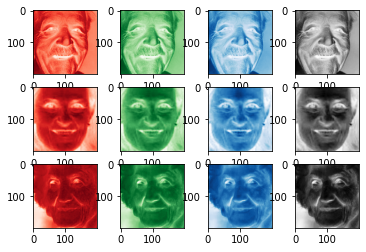

In [ ]:
plt.subplot(3,4,1)
plt.imshow(data.iloc[0,3].reshape(200,200),cmap = 'Reds')
plt.subplot(3,4,2)
plt.imshow(data.iloc[0,4].reshape(200,200),cmap = 'Greens')
plt.subplot(3,4,3)
plt.imshow(data.iloc[0,5].reshape(200,200),cmap = 'Blues')
plt.subplot(3,4,4)
plt.imshow(data.iloc[0,6].reshape(200,200),cmap = 'Greys')

plt.subplot(3,4,5)
plt.imshow(data.iloc[12000,3].reshape(200,200),cmap = 'Reds')
plt.subplot(3,4,6)
plt.imshow(data.iloc[12000,4].reshape(200,200),cmap = 'Greens')
plt.subplot(3,4,7)
plt.imshow(data.iloc[12000,5].reshape(200,200),cmap = 'Blues')
plt.subplot(3,4,8)
plt.imshow(data.iloc[12000,6].reshape(200,200),cmap = 'Greys')

plt.subplot(3,4,9)
plt.imshow(data.iloc[23000,3].reshape(200,200),cmap = 'Reds')
plt.subplot(3,4,10)
plt.imshow(data.iloc[23000,4].reshape(200,200),cmap = 'Greens')
plt.subplot(3,4,11)
plt.imshow(data.iloc[23000,5].reshape(200,200),cmap = 'Blues')
plt.subplot(3,4,12)
plt.imshow(data.iloc[23000,6].reshape(200,200),cmap = 'Greys')
plt.show()


Plotting the brightness and intensity values

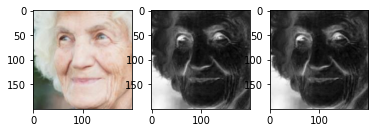

In [ ]:
img = np.zeros([200,200,3], dtype = np.uint8)

img[:,:,0] = data.iloc[23000,5].reshape(200,200)
img[:,:,1] = data.iloc[23000,4].reshape(200,200)
img[:,:,2] = data.iloc[23000,3].reshape(200,200)

imgt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
hsvt = cv2.cvtColor(imgt,cv2.COLOR_BGR2HSV)
vt = hsvt[:,:,2]
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
v = hsv[:,:,2]
plt.subplot(1,3,1)
plt.imshow(imgt)
plt.subplot(1,3,2)
plt.imshow(vt,cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(v,cmap = 'Greys')

plt.show()

Edge map 

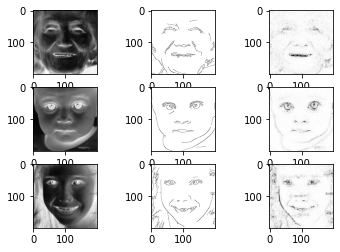

In [ ]:
img1 = data.iloc[23001,6].reshape(200,200)
edge1 = cv2.Canny(img1,100,200)
img2 = data.iloc[2301,6].reshape(200,200)
edge2 = cv2.Canny(img2,100,200)
img3 = data.iloc[23301,6].reshape(200,200)
edge3 = cv2.Canny(img3,100,200)

ddepth = cv2.CV_16S
dst1 = cv2.Laplacian(img1, ddepth, ksize=3)
abs_dst1 = cv2.convertScaleAbs(dst1)
dst2 = cv2.Laplacian(img2, ddepth, ksize=3)
abs_dst2 = cv2.convertScaleAbs(dst2)
dst3 = cv2.Laplacian(img3, ddepth, ksize=3)
abs_dst3 = cv2.convertScaleAbs(dst3)

plt.subplot(3,3,1)
plt.imshow(img1,cmap = 'Greys')
plt.subplot(3,3,2)
plt.imshow(edge1,cmap = 'Greys')
plt.subplot(3,3,3)
plt.imshow(abs_dst1, cmap = 'Greys')

plt.subplot(3,3,4)
plt.imshow(img2,cmap = 'Greys')
plt.subplot(3,3,5)
plt.imshow(edge2,cmap = 'Greys')
plt.subplot(3,3,6)
plt.imshow(abs_dst2, cmap = 'Greys')

plt.subplot(3,3,7)
plt.imshow(img3,cmap = 'Greys')
plt.subplot(3,3,8)
plt.imshow(edge3,cmap = 'Greys')
plt.subplot(3,3,9)
plt.imshow(abs_dst3, cmap = 'Greys')

plt.show()

Histogram Equalization

(0.0, 256.0)

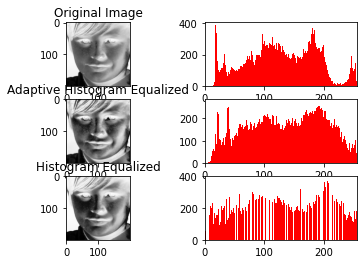

In [ ]:
img = data.iloc[23640,6].reshape(200,200)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
hist = cv2.equalizeHist(img)

plt.subplot(3,2,1)
plt.imshow(img,cmap = 'Greys')
plt.title("Original Image")

plt.subplot(3,2,2)
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.subplot(3,2,3)
plt.imshow(cl1,cmap = 'Greys')
plt.title("Adaptive Histogram Equalized")

plt.subplot(3,2,4)
plt.hist(cl1.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])

plt.subplot(3,2,5)
plt.imshow(hist,cmap = 'Greys')
plt.title("Histogram Equalized")

plt.subplot(3,2,6)
plt.hist(hist.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])

DOG, LOG, Equalization techniques

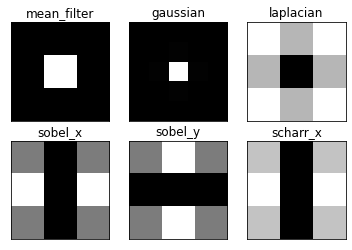

In [ ]:

mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()


Creating the numpy arrays for saving them.

In [ ]:
row,col = data.shape
print(row)

img = np.zeros([row,100,100,3])
grey = np.zeros([row,100,100])
img_temp = np.zeros([200,200,3])
y_gender = np.zeros([row,1])
y_age = np.zeros([row,1])
vSum = np.zeros([row,1])
blackSum = np.zeros([row,1])
blackSumHist = np.zeros([row,1])

lookUpTable1 = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable1[0,i] = np.clip(pow(i / 255.0, 1.5) * 255.0, 0, 255)
lookUpTable2 = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable2[0,i] = np.clip(pow(i / 255.0, 1.2) * 255.0, 0, 255)

for r in range (0,row):
  r_temp = data.iloc[r,3].reshape(200,200)
  g_temp = data.iloc[r,4].reshape(200,200)
  b_temp = data.iloc[r,5].reshape(200,200)
  grey_temp = data.iloc[r,6].reshape(200,200)
  img_temp = np.dstack((b_temp , g_temp , r_temp))

  blackSum[r] = sum(grey_temp.reshape(-1))/40000
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1 = clahe.apply(grey_temp)
  grey[r,:,:] = cl1
  blackSumHist[r] = sum(cl1.reshape(-1))/40000

  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
  vSum[r] = sum(hsv[:,:,2].reshape(-1))/40000
  if(vSum[r] > 50):
    img[r,:,:,:] = cv2.LUT(image, lookUpTable1)
  else:
    img[r,:,:,:] = cv2.LUT(image, lookUpTable2)

  img[r] = cv2.resize(img_temp, (100,100), interpolation = cv2.INTER_AREA)
  y_gender[r] = data.iloc[r,1]
  y_age[r] = data.iloc[r,0]
  grey[r] = cv2.resize(grey_temp, (100,100), interpolation = cv2.INTER_AREA)

print(img.shape)

23705
(23705, 100, 100, 3)


In [ ]:
print(grey.shape)

(23705, 100, 100)


In [ ]:
img = img/255
grey = grey/255

np.save("/drive/My Drive/ML Data/ImageNumpyTemp.npy",  img)
np.save("/drive/My Drive/ML Data/Gender.npy",  y_gender)
np.save("/drive/My Drive/ML Data/Age.npy", y_age)
np.save("/drive/My Drive/ML Data/GreyImg.npy",  grey)

Further steps - Using Harr cascade and rotating an image to straigten it before saving them.

In [ ]:
# Will write the Harr cascade code later on